In [3]:
import pandas as pd
import torch
import torch.nn as nn

In [6]:
df = pd.read_csv("/content/Raisin_Dataset.csv")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [11]:
# prompt: correlation table

df.corr()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,-0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,-0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,-0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,-0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,-0.665981
Class,-0.625715,-0.673194,-0.503102,-0.438500,-0.625567,0.154689,-0.665981,1.000000


In [3]:
df.shape

(900, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

Kecimen - 1
Besni - 0

In [7]:
df['Class'].replace({'Besni': 0, 'Kecimen': 1}, inplace=True)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [8]:
X = df.drop('Class', axis=1)
y = df['Class']
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X = StandardScaler().fit_transform(X)
X[:10]

array([[-7.18636823e-03,  9.75769473e-02, -2.39581868e-02,
         4.23141637e-01, -1.57090276e-02,  1.10674264e+00,
         6.62739660e-02],
       [-3.24217186e-01, -2.09012072e-01, -2.29292219e-01,
         2.24476390e-01, -3.04248197e-01, -2.87776790e-01,
        -1.61252453e-01],
       [ 7.82924055e-02,  9.77583458e-02,  2.36987967e-01,
         1.86239068e-01,  6.21133511e-02, -1.15824974e+00,
         1.55944681e-01],
       [-1.07428573e+00, -1.24505128e+00, -9.15273485e-01,
        -1.06962266e+00, -1.07616471e+00,  1.71147419e-03,
        -1.17591488e+00],
       [-2.15393369e-01, -6.78957894e-01,  7.27353556e-01,
        -2.40982731e+00, -2.38623145e-01,  1.74525897e+00,
        -3.38638561e-01],
       [-9.89268726e-01, -9.72699165e-01, -1.08816636e+00,
        -4.64268939e-02, -9.77211756e-01, -7.68202364e-01,
        -1.03822364e+00],
       [-1.16243251e+00, -1.04150396e+00, -1.56835315e+00,
         4.60367241e-01, -1.16039253e+00, -6.29029114e-01,
        -1.2503487

In [12]:
X = torch.FloatTensor(X).type(torch.float32)
y = torch.FloatTensor(y).type(torch.float32).view(900, 1)

In [15]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [16]:
y[:10]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [64]:
class BinaryClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(7, 16)
    self.l2 = nn.Linear(16, 1)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)
    return self.sigmoid(x)

In [65]:
model = BinaryClassification()

In [66]:
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.07)

In [67]:
for epoch in range(10001):
  yhat = model(Xtrain)
  loss_value = loss(yhat, ytrain)
  optimizer.zero_grad()
  loss_value.backward()
  optimizer.step()
  if epoch % 500 == 0:
    print(f"Epoch: {epoch}, Loss: {loss_value.item()}")

Epoch: 0, Loss: 0.7239155173301697
Epoch: 500, Loss: 0.3306787610054016
Epoch: 1000, Loss: 0.324746698141098
Epoch: 1500, Loss: 0.32040148973464966
Epoch: 2000, Loss: 0.3174612522125244
Epoch: 2500, Loss: 0.31517288088798523
Epoch: 3000, Loss: 0.3125966489315033
Epoch: 3500, Loss: 0.31023070216178894
Epoch: 4000, Loss: 0.3076061010360718
Epoch: 4500, Loss: 0.30529704689979553
Epoch: 5000, Loss: 0.3025171160697937
Epoch: 5500, Loss: 0.29990383982658386
Epoch: 6000, Loss: 0.29754501581192017
Epoch: 6500, Loss: 0.2953663766384125
Epoch: 7000, Loss: 0.29322338104248047
Epoch: 7500, Loss: 0.2911634147167206
Epoch: 8000, Loss: 0.28896820545196533
Epoch: 8500, Loss: 0.2867458760738373
Epoch: 9000, Loss: 0.28489238023757935
Epoch: 9500, Loss: 0.28328442573547363
Epoch: 10000, Loss: 0.2817343771457672


In [68]:
ypred = torch.round(model(Xtest))
ypred[:10]

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)

In [69]:
ytest[:10]

tensor([[0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]])

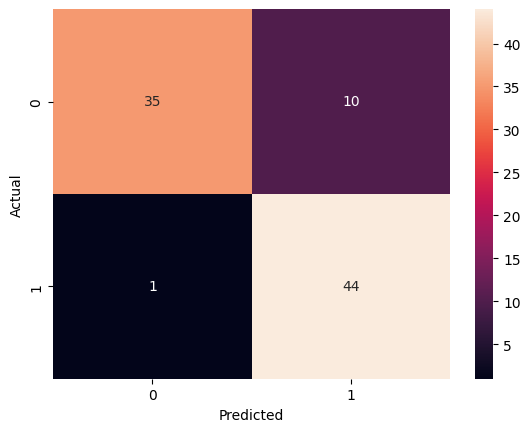

In [62]:
# prompt: show confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ypred and ytest are PyTorch tensors, convert them to numpy arrays
ypred_np = ypred.detach().numpy()
ytest_np = ytest.detach().numpy()

cm = confusion_matrix(ytest_np, ypred_np)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [54]:
from sklearn import metrics

In [63]:
print(metrics.classification_report(ytest_np, ypred_np))
print("Model aniqligi:", metrics.accuracy_score(ytest_np, ypred_np))

              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86        45
         1.0       0.81      0.98      0.89        45

    accuracy                           0.88        90
   macro avg       0.89      0.88      0.88        90
weighted avg       0.89      0.88      0.88        90

Model aniqligi: 0.8777777777777778
